# Matplotlib

Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python: 

- Darstellung von Daten in Publikationsqualität
- Erstellung interaktiver Abbildungen, die sich zoomen, schwenken und aktualisieren lassen. 
- Export der Darstellungen in verschiedene Dateiformate
- Einbettung der Figuren in GUIs
    
Matplotlib muss - genau wie Numpy - mit dem import Befehl importiert werden. 
Für die Erstellung einfacher Grafiken nutzt man das **pyplot Interface**, mit welchem eine MATLAB-ähnliche Art des Plottens möglich ist. Über das **pyplot Interface** lassen sich Figuren öffnen und deren Inhalte bearbeiten.

Es gibt grundsätzlich **zwei Ansätze, um Diagramme mit matplotlib zu erstellen**: 

- Nicht objekt-orientierter Ansatz über das funktionale Interface 
- Objekt-orientierter Ansatz über das objekt-orientierte Interface

Im Folgenden werden beide Ansätze vorgestellt, wobei dann im Laufe der kommenden Vorlesungen nur noch mit dem OOP Ansatz gearbeitet wird, da dieser mehr Kontrolle und Anpassungsmöglichkeiten über die Plots bietet und daher der empfohlene Ansatz ist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Damit im Notebook die figure nicht nur als Bild sondern als interaktive Grafik dargestellt wird:
%matplotlib notebook

## Erstes Beispiel nicht objekt-orientiert

### Daten für die Darstellung erzeugen

Möchte man Daten in einem Diagramm darstellen, so ist es essentiell, dass für jeden darzustellenden Wert auf der y-Achse ein zugehöriger Wert auf der x-Achse gegeben ist. Im Folgendne wird hierfür ein Zeitvektor t erzeugt, mit welchem ein Signalvektor berechnet wird. Dadurch ist automatisch sicher gesellt, dass beide Vektoren dieselbe Länge, also dieselbe Anzahl Elemente aufweisen. 

In [2]:
t = np.linspace(0, 1, 100)
s1 = np.sin(2*np.pi*t)
s2 = s1 + np.random.randn(*s1.shape)/4

### Diagramm erstellen

Beim nicht objekt-orientierten Ansatz werden über das **pyplot Interface** verschiedene Befehle aufgerufen, welche alle Änderungen an derselben **figure** vornehmen. <br>
Es handelt sich hierbei um eine zustandsbasiertes Schnittstelle, bei der der Zustand (die **Figure**) während der verschiedenen Funktionsaufrufe erhalten bleibt. Die Schnittstelle erlaubt es, Elemente hinzuzufügen und den Plot innerhalb derselben figure zu verändern. <br>
Die Schnittstelle weist viele Ähnlichkeiten zur MATLAB-Syntax auf. <br>
Dieser Ansatz bietet im Gegensatz zum objekt-orientierten Ansatz weniger Kontrolle und Anpassungsmöglichkeiten und ist daher nicht die empfohlene Art und Weise, um mit matplotlib Diagramme zu erstellen. 

<IPython.core.display.Javascript object>


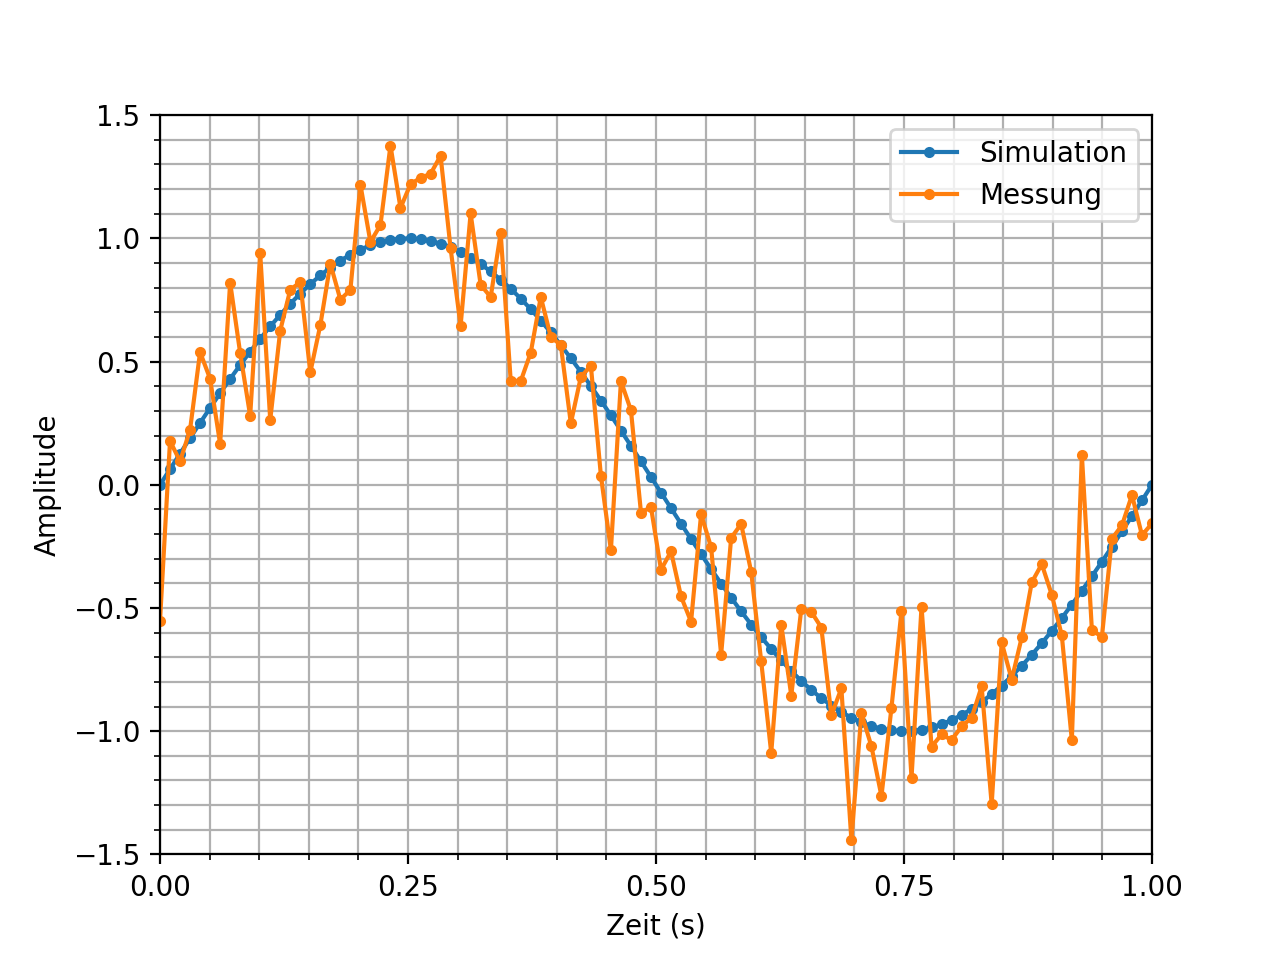

In [3]:
# Eine neue figure erzeugen
plt.figure();

# Plotte s1/s2 gegenüber t als Linie mit Punkten
plt.plot(t, s1, '.-', label='Simulation')
plt.plot(t, s2, '.-', label='Messung')

# Achsen beschriften
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')

# Achsen limiteren
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

# Ticks verändern
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1,  1.5])

# Hilfslinien aktivieren
plt.grid(which='both')
plt.minorticks_on()

# Legende hinzufügen
plt.legend()

# Diagramm abspeichern
plt.savefig('diagramm_nOOP.pdf')

## Beispiel objekt-orientiert

Die Idee hinter Verwendung des objekt-orientierten Ansatzes besteht darin, Figuren- und Achsenobjekte zu erzeugen und dann über diese Objekte die entsprechenden Methoden und Attribute aufzurufen. 
Dieser Ansatz ist besonders gut für Situationen geeignet, in denen man mit mehreren Subplots gleichzeitig arbeiten muss. <br>
Beim objekt-orientierten Ansatz wird über das **pyplot Interface** ein figure-Objekt sowie (ein oder mehrere) axes-objekte erzeugt. Die meisten für die Darstellung verwendeten Methoden werden dann über die axes-objekte aufgerufen. 

<IPython.core.display.Javascript object>


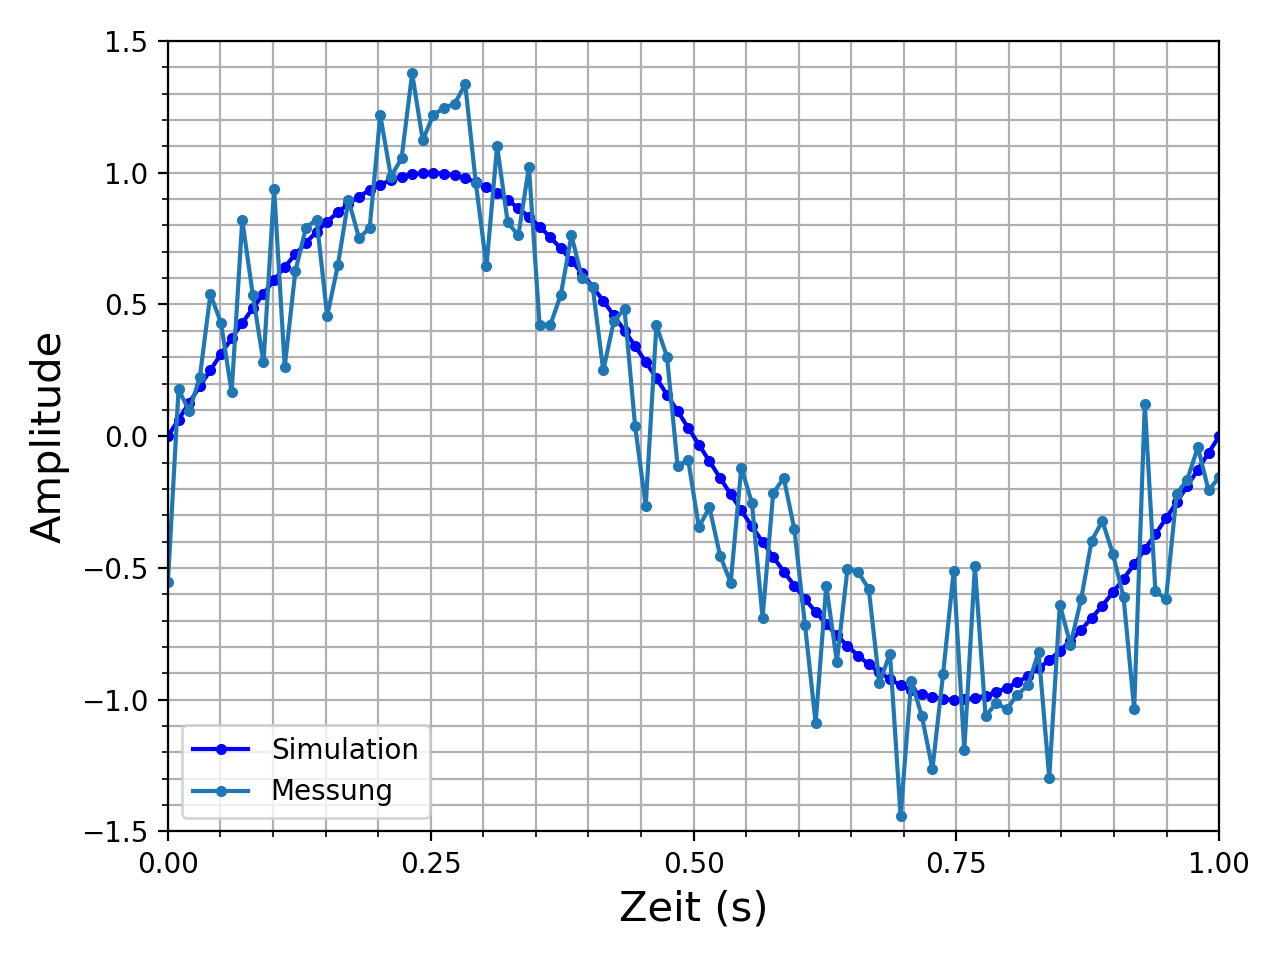

In [4]:
# Erzeuge eine figure und ein Set von subplots
# Achtung: Die neuste matplotlib-Version empfiehlt layout="tight" bzw. layout="constrained": 
# https://matplotlib.org/3.5.0/api/figure_api.html
fig, ax = plt.subplots(tight_layout=True)

# oder:
# fig = plt.figure(tight_layout=True)
# ax = fig.add_subplot()

# Signale plotten
ax.plot(t, s1, linestyle='-', marker='.', color="blue", label='Simulation')
ax.plot(t, s2, '.-', label='Messung')

# Achsen beschriften
ax.set_xlabel('Zeit (s)', fontsize=15)
ax.set_ylabel('Amplitude', fontsize=15)

# Achsen limitieren
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)

# Ticks verändern
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticks([-1.5, -1, -0.5, 0, 0.5, 1,  1.5])
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))

# Hilfslinien aktivieren
# plt.grid(b=True, which='major', color='b', linestyle='-')
# plt.grid(b=True, which='minor', color='r', linestyle='--')
ax.grid(which="both")
ax.minorticks_on()

# Legende hinzufügen
ax.legend(loc="lower left")

# Diagramm abspeichern
fig.savefig('diagramm_OOP_tight.pdf')

## Einfaches Beispiel OOP mit zwei subplots

In [ ]:
s2 = s2/10

<IPython.core.display.Javascript object>


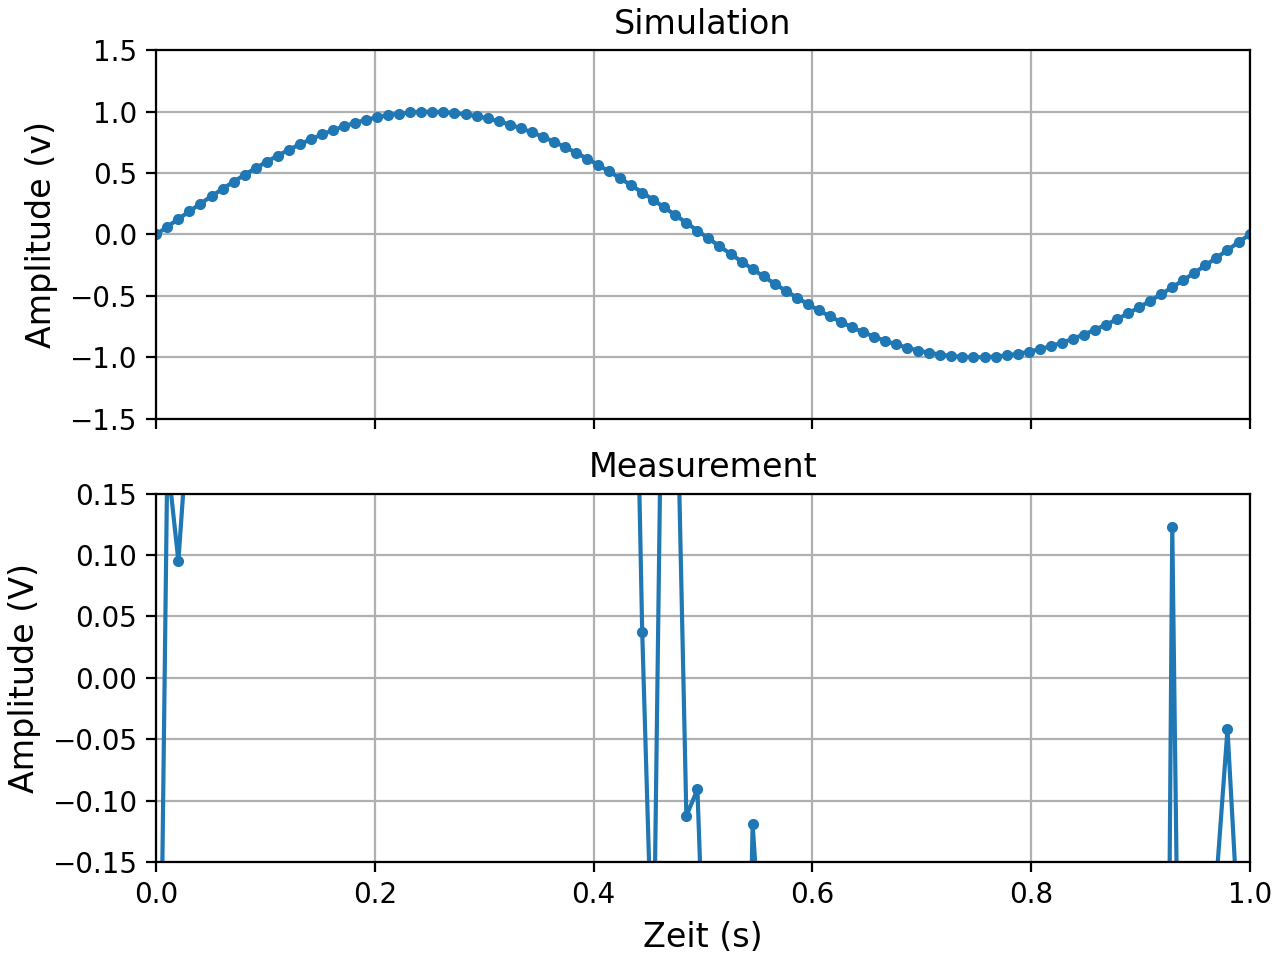

In [5]:
# Figure und axes objekte erzeugen
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, constrained_layout=True)

# Signale plotten
ax1.plot(t, s1, '.-')
ax2.plot(t, s2, '.-')

# Achsen beschriften
ax1.set_ylabel('Amplitude (v)', fontsize=12)
ax2.set_xlabel('Zeit (s)', fontsize=12)
ax2.set_ylabel('Amplitude (V)', fontsize=12)

# Achsen limitieren
ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(-1.5/10, 1.5/10)
ax1.set_xlim(0, 1)

# Subplots beschriften
ax1.set_title("Simulation")
ax2.set_title("Measurement")

# Hilfslinien aktivieren
ax1.grid(True)
ax2.grid(True)

# Diagramm abspeichern
fig.savefig('diagramm_subplots.pdf')

Bei mehreren Subplots auf beiden Achsen ist es sinnvoller die axes-objekte in einem numpy array zusammen gefasst entgegen zu nehmen (ohne unpacking wie oben) und dann über normale Indexierung auf die entsprechenden subplots zuzugreifen:

<IPython.core.display.Javascript object>


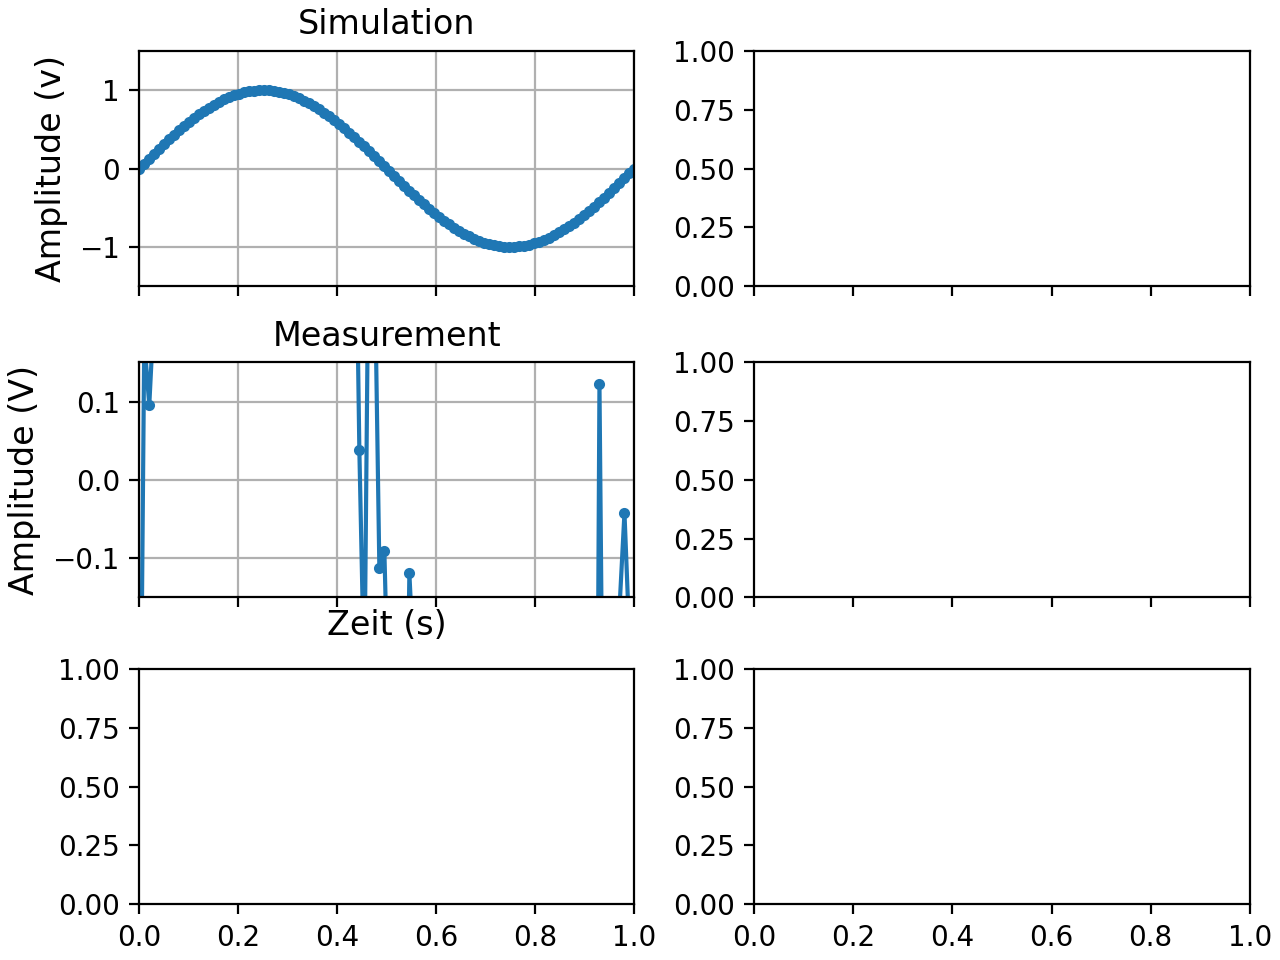

In [6]:
# Figure und axes objekte erzeugen
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, constrained_layout=True)

# Signale plotten
ax[0, 0].plot(t, s1, '.-', label='Simulation')
ax[1, 0].plot(t, s2, '.-', label='Simulation')

# Achsen beschriften
ax[0, 0].set_ylabel('Amplitude (v)', fontsize=12)
ax[1, 0].set_xlabel('Zeit (s)', fontsize=12)
ax[1, 0].set_ylabel('Amplitude (V)', fontsize=12)

# Achsen limitieren
ax[0, 0].set_ylim(-1.5, 1.5)
ax[1, 0].set_ylim(-1.5/10, 1.5/10)
ax[0, 0].set_xlim(0, 1)

# Subplots beschriften
ax[0, 0].set_title("Simulation")
ax[1, 0].set_title("Measurement")

# Hilfslinien aktivieren
ax[0, 0].grid(True)
ax[1, 0].grid(True)

Die fig.add_subplot() Methode kann ebenfalls verwendet werden, um verschiedene subplots zur figure hinzuzufügen. <br>
Vor allem dann, wenn man verschiedene Projektionen innerhalb einer figure verwenden möchte, ist es sehr sinnvoll mit dieser Methode zu arbeiten: 

<IPython.core.display.Javascript object>


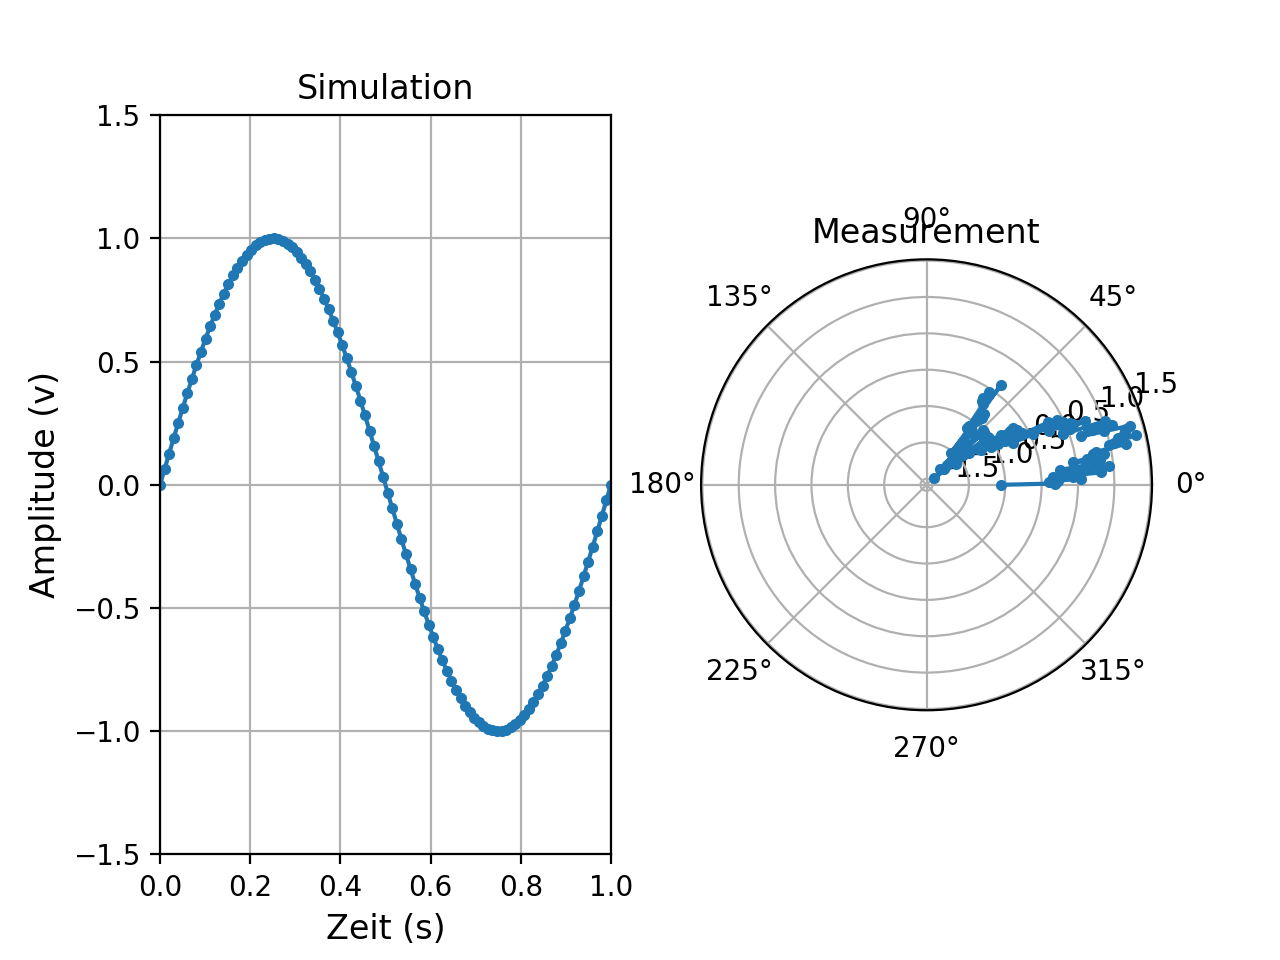

In [7]:
# Figure und axes-objekte erzeugen
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='polar')

# Signale plotten
ax1.plot(t, s1, '.-')
ax2.plot(t, s2, '.-')

# Achsen beschriften
ax1.set_xlabel('Zeit (s)', fontsize=12)
ax1.set_ylabel('Amplitude (v)', fontsize=12)

# Achsen limitieren
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(0, 1)

# Subplots beschriften
ax1.set_title("Simulation")
ax2.set_title("Measurement", y=1)

# Hilfslinien aktivieren
ax1.grid()

## Pyplot Funktionen

Je nach darzustellender Daten ist es sinnvoller diese mit logarithmisch skalierten Achsen darzustellen. <br>
Hierfür bietet das pyplot Interface entsprechende Funktionen:

### loglog()

In [9]:
f = np.logspace(-2, 1, 20)
s = np.exp(-f)

<IPython.core.display.Javascript object>


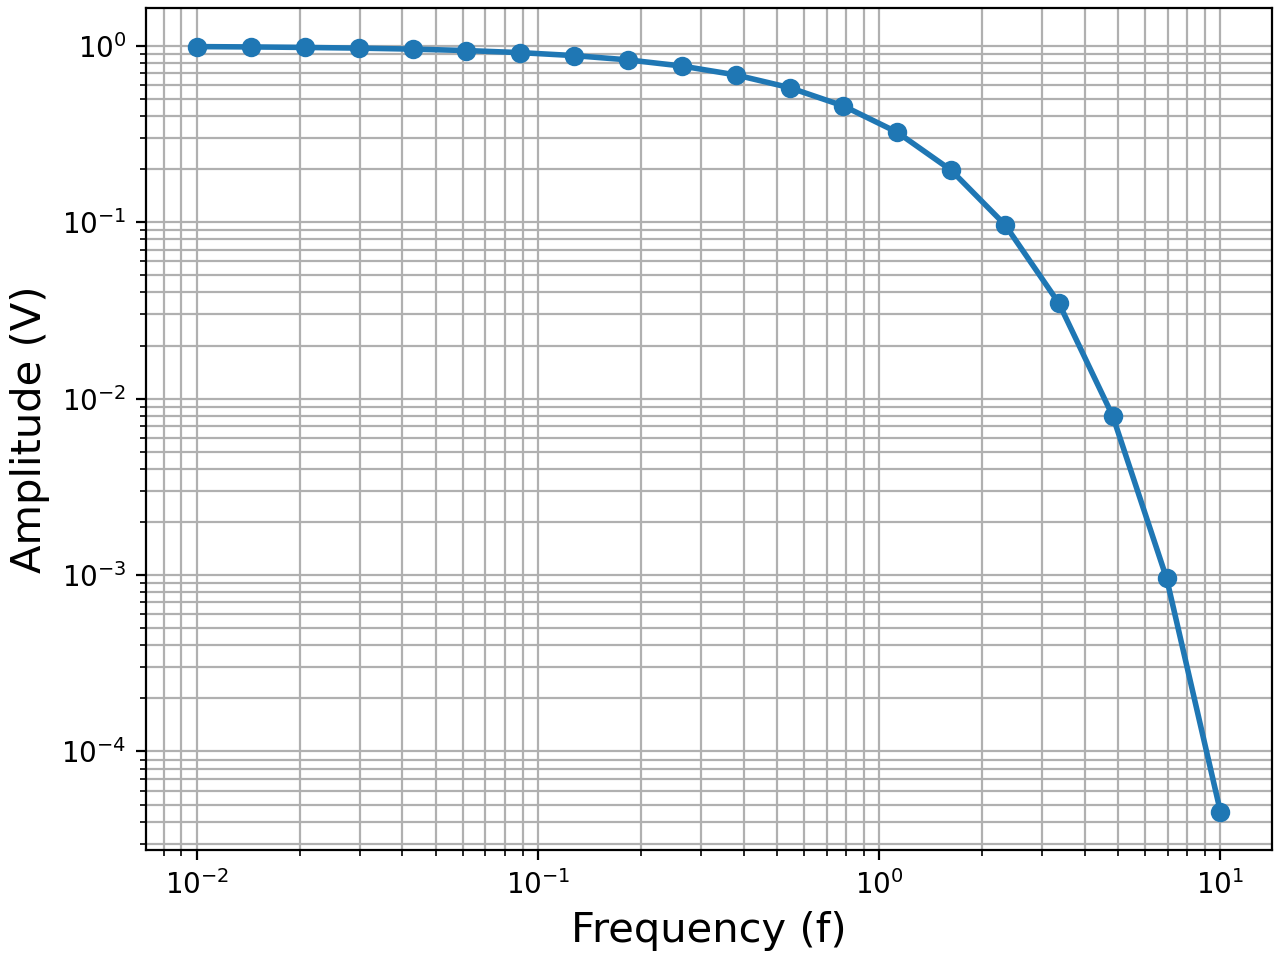

In [10]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.loglog(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both');

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_loglog.pdf')

### semilogx()

<IPython.core.display.Javascript object>


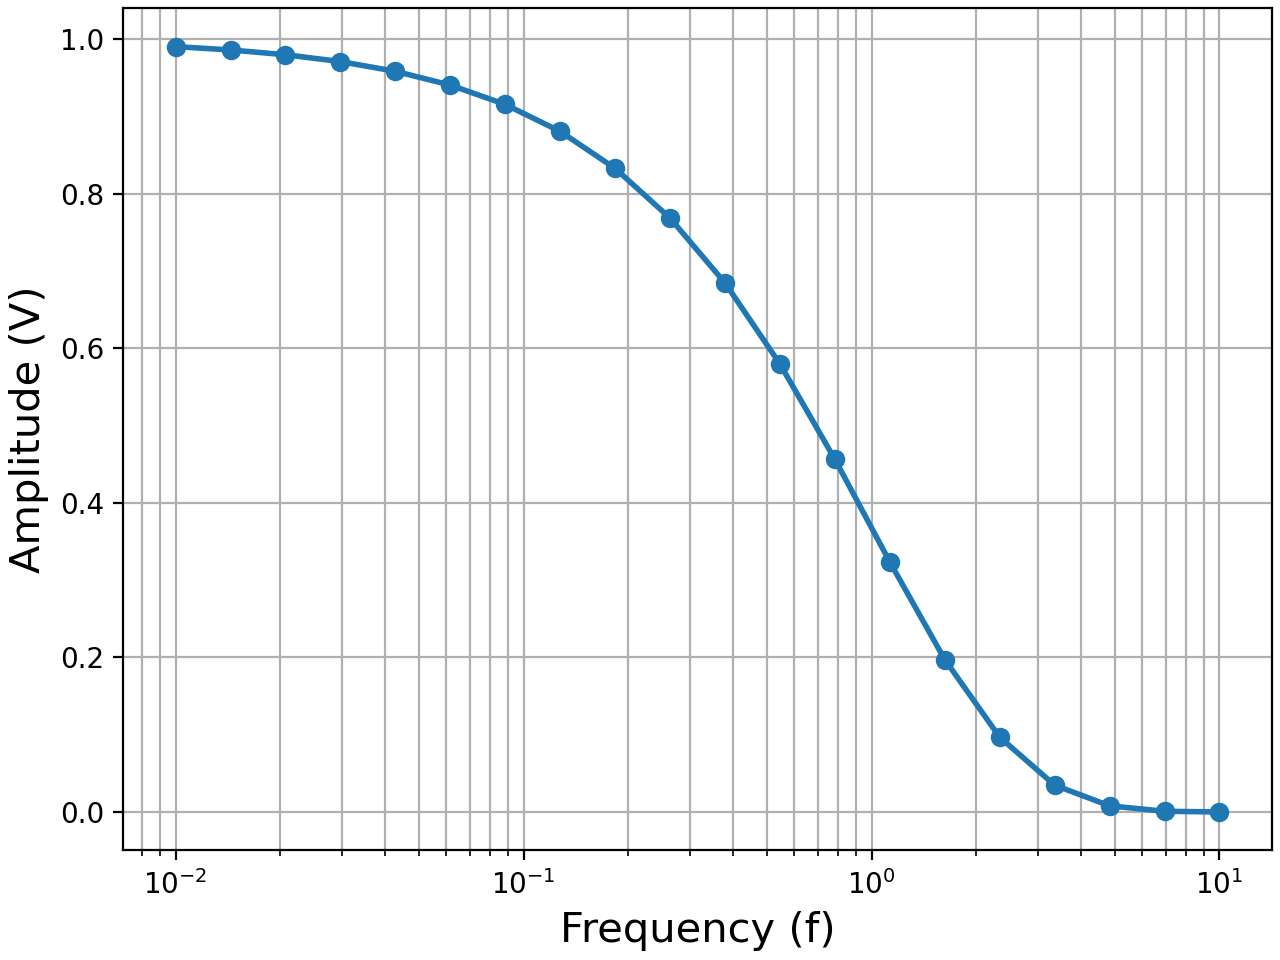

In [11]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.semilogx(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both')

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_semilogx.pdf')

### semilogy()

<IPython.core.display.Javascript object>


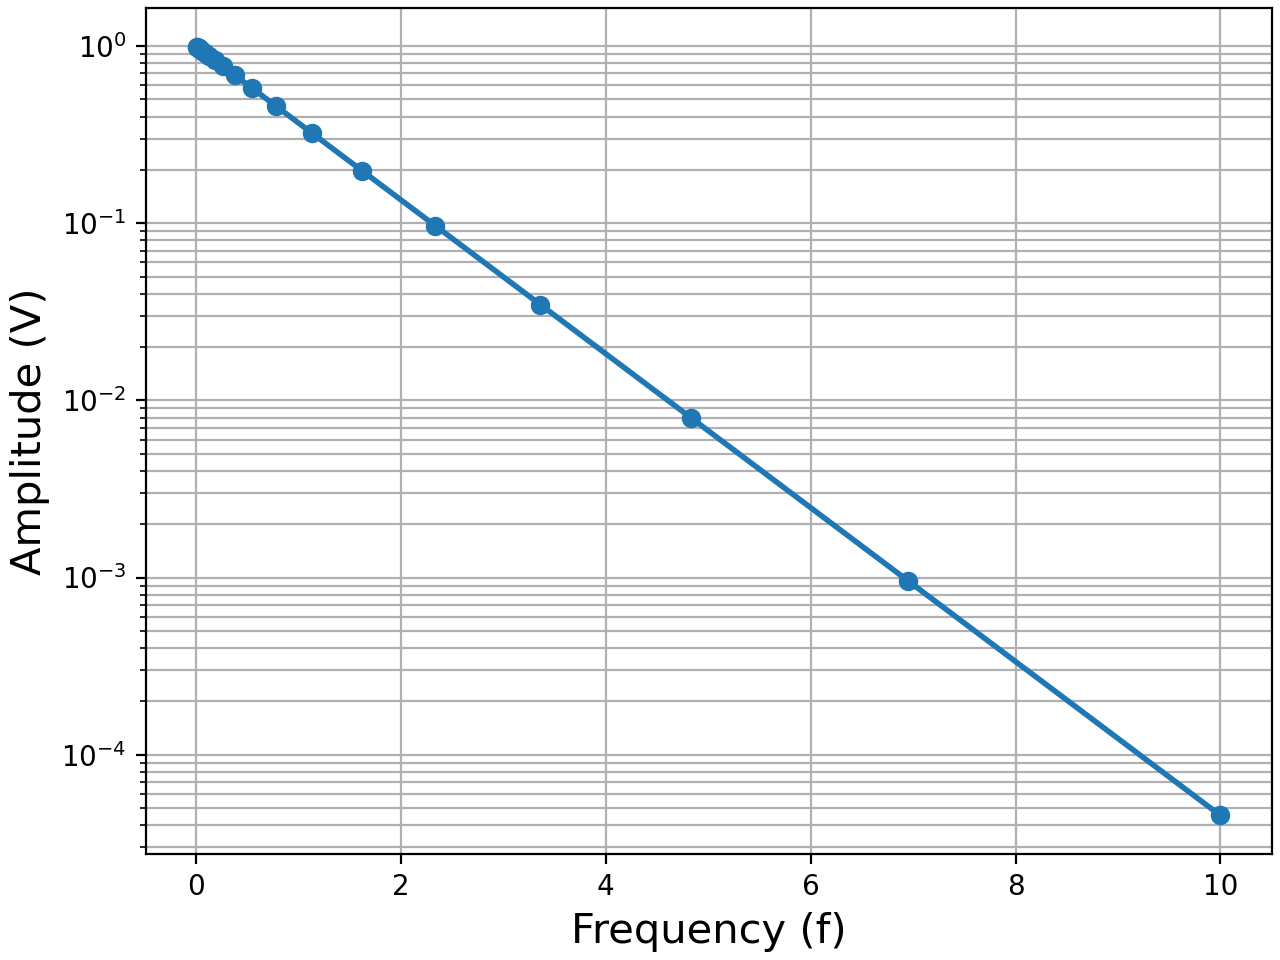

In [12]:
# Figure und Axis erstellen
fig, ax = plt.subplots(constrained_layout=True)

# Signale plotten
ax.semilogy(f, s, '-o', linewidth=2)

# Hilfslinien aktivieren
ax.grid(which='both')

# Achsen beschriften
ax.set_xlabel('Frequency (f)', fontsize=15)
ax.set_ylabel('Amplitude (V)', fontsize=15)

# Diagramm abspeichern
fig.savefig('diagramm_semilogy.pdf')